In [135]:
from quantrocket.license import set_license

In [41]:
set_license("f22f9561-dddb-11ee-a01a-8bdf3e4aa2bb")

{'licensekey': 'f22f........a2bb', 'software_license': {}}

In [42]:
from quantrocket.license import get_license_profile
get_license_profile(force_refresh=True)

{'licensekey': 'f22f........a2bb', 'software_license': {}}

To collect end-of-day sample data for US stocks

In [44]:
from quantrocket.history import drop_db
drop_db("usstock-free-1d", confirm_by_typing_db_code_again="usstock-free-1d")

{'status': 'deleted quantrocket.v2.history.usstock-free-1d.sqlite'}

In [45]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [46]:
#Then collect the data:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [110]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [111]:
filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False
FIBBG00B3T3HD3,AA,XNYS,ALCOA CORP,False


#### Ensure you are able to pull price data (daily close prices only) for Apple stock (sid=‘AAPL’) 

In [112]:
aapl=securities[securities['Symbol']=='AAPL']
print("AAPL :::")
print(aapl)

AAPL :::
               Symbol Exchange Country Currency SecType    Etf  \
Sid                                                              
FIBBG000B9XRY4   AAPL     XNAS      US      USD     STK  False   

                        Timezone       Name  PriceMagnifier  Multiplier  \
Sid                                                                       
FIBBG000B9XRY4  America/New_York  APPLE INC               1           1   

                Delisted DateDelisted LastTradeDate RolloverDate  
Sid                                                               
FIBBG000B9XRY4     False          NaT           NaT          NaT  


In [134]:
filtered_aapl = aapl[aapl.Delisted==False]
# also limit the number of columns for readability
filtered_aapl = filtered_aapl[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_aapl

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

#### Year 2023 (01-01-2023 to 12-31-2023).

In [115]:
from quantrocket import get_prices

aapl_SID=filtered_aapl.index[0]
aapl_Prices = get_prices("usstock-free-1d",sids=aapl_SID,start_date="2023-01-01",end_date="2023-12-31", fields=["Close"])
print(aapl_Prices)

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616
...                          ...
      2023-12-22        193.3533
      2023-12-26        192.8040
      2023-12-27        192.9038
      2023-12-28        193.3333
      2023-12-29        192.2846

[250 rows x 1 columns]


In [116]:
reset= aapl_Prices.reset_index()
columns=reset.columns
print(columns)
aapl_processing = reset[['Date', 'FIBBG000B9XRY4']]
#setting index as date
aapl_processing.set_index('Date', inplace=True)
print(aapl_processing)


Index(['Field', 'Date', 'FIBBG000B9XRY4'], dtype='object', name='Sid')
Sid         FIBBG000B9XRY4
Date                      
2023-01-03        124.2163
2023-01-04        125.4975
2023-01-05        124.1666
2023-01-06        128.7352
2023-01-09        129.2616
...                    ...
2023-12-22        193.3533
2023-12-26        192.8040
2023-12-27        192.9038
2023-12-28        193.3333
2023-12-29        192.2846

[250 rows x 1 columns]


# Preprocessing

No. of null values= 0
2023-01-03 00:00:00 2023-12-29 00:00:00
True


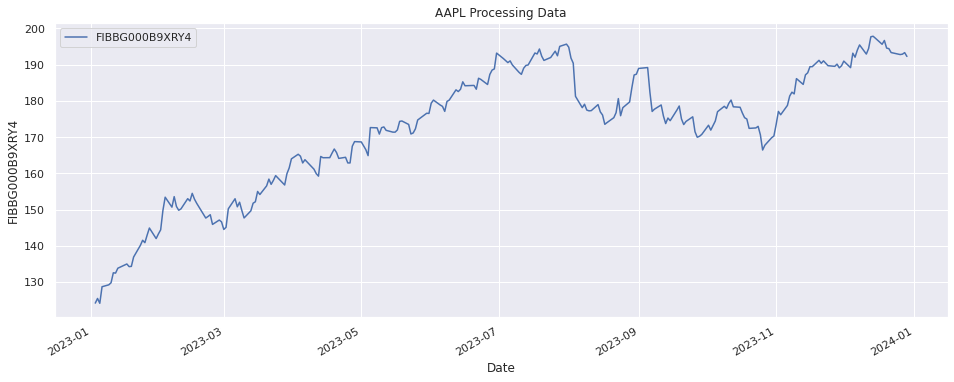

In [137]:
# Checking for missing values
print("No. of null values=",aapl_processing.isnull().sum().values[0])

# Verify date range
print(aapl_processing.index.min(), aapl_processing.index.max())

# Check for duplicates
print(aapl_processing.duplicated().any())  

# PLotting
aapl_processing.plot(y='FIBBG000B9XRY4', kind='line', title='AAPL Processing Data')
plt.xlabel('Date')
plt.ylabel('FIBBG000B9XRY4')
plt.show()


#### Outliers

In [160]:
#outliers using Z-score

z_scores = (aapl_processing['FIBBG000B9XRY4'] - aapl_processing['FIBBG000B9XRY4'].mean()) / aapl_processing['FIBBG000B9XRY4'].std()
threshold = 3
outliers = aapl_processing[abs(z_scores) > threshold]
print("Outliers:",outliers)

Outliers: Empty DataFrame
Columns: [FIBBG000B9XRY4]
Index: []


In [119]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = aapl_processing['FIBBG000B9XRY4'].quantile(0.25)
Q3 = aapl_processing['FIBBG000B9XRY4'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers_iqr = aapl_processing[(aapl_processing['FIBBG000B9XRY4'] < lower_bound) | (aapl_processing['FIBBG000B9XRY4'] > upper_bound)]

# Print the outliers using IQR
print("Outliers using IQR:")
print(outliers_iqr)


Outliers using IQR:
Empty DataFrame
Columns: [FIBBG000B9XRY4]
Index: []


In [120]:
if len(outliers) or len(outliers_iqr):
    print('We have outliers which means there has been risk ')
else:
    print("No outliers so not much risk")


No outliers so not much risk


#### Let r(d) be the % returns on day d. That is,
r(d) = (p(d) - p(d-1))/p(d-1).

In [138]:
close_aapl= aapl_Prices.loc['Close']
print(close_aapl)
return_aapl_prices=[0]*len(close_aapl)
for i in range(1,len(aapl_Prices)):
    return_prices = ((close_aapl.iloc[i] - close_aapl.iloc[i - 1]) / close_aapl.iloc[i - 1])
    return_aapl_prices[i]=return_prices
return_price = [value[0] for value in return_aapl_prices[1:]]
print(return_price) 

Sid         FIBBG000B9XRY4
Date                      
2023-01-03        124.2163
2023-01-04        125.4975
2023-01-05        124.1666
2023-01-06        128.7352
2023-01-09        129.2616
...                    ...
2023-12-22        193.3533
2023-12-26        192.8040
2023-12-27        192.9038
2023-12-28        193.3333
2023-12-29        192.2846

[250 rows x 1 columns]
[0.010314266324145852, -0.010604992131317355, 0.036794113714960296, 0.004089013727403191, 0.0044568533887869655, 0.02111174181304805, -0.0005988891134932025, 0.010119291106223888, 0.008755964202085723, -0.005369889069201903, 0.00044382520733554447, 0.019220420002873165, 0.02350051742181537, 0.010063019633698222, -0.004700576657758638, 0.014803568982417012, 0.013683980824941603, -0.02007811836982236, 0.009021016885186315, 0.00790062600702964, 0.037062448550339945, 0.02440007877669143, -0.017928852868838087, 0.01924492167255171, -0.017652987348497063, -0.006911315390070449, 0.002455949738454667, 0.018807228899620585, -0

Sid  Field       Date  FIBBG000B9XRY4  Return_Price
0    Close 2023-01-03        124.2163      0.000000
1    Close 2023-01-04        125.4975      0.010314
2    Close 2023-01-05        124.1666     -0.010605
3    Close 2023-01-06        128.7352      0.036794
4    Close 2023-01-09        129.2616      0.004089
..     ...        ...             ...           ...
245  Close 2023-12-22        193.3533     -0.005547
246  Close 2023-12-26        192.8040     -0.002841
247  Close 2023-12-27        192.9038      0.000518
248  Close 2023-12-28        193.3333      0.002226
249  Close 2023-12-29        192.2846     -0.005424

[250 rows x 4 columns]


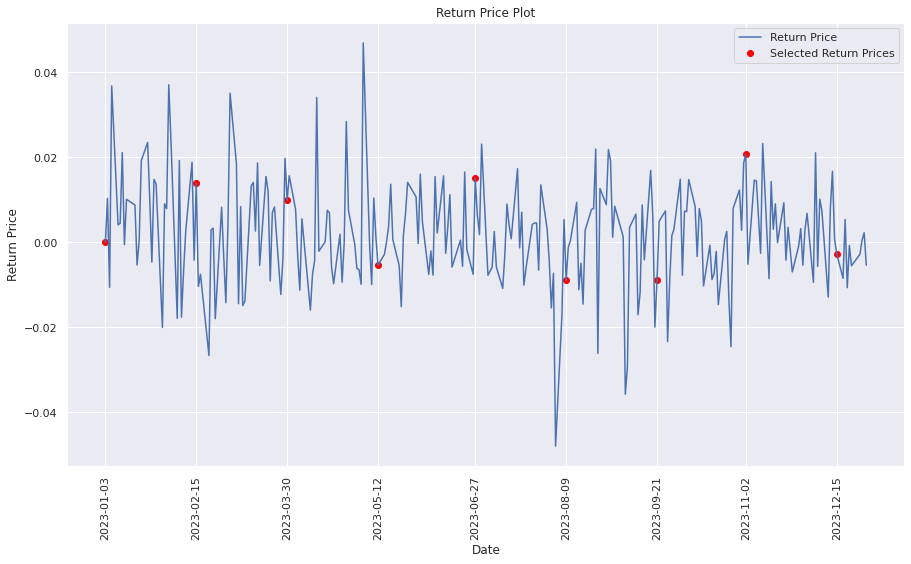

In [191]:
reset['Return_Price'] = [0] + return_price
dates = reset['Date'] 
return_amt = reset['Return_Price']
print(reset)
plt.figure(figsize=(15, 8))
plt.plot(dates, return_amt, label='Return Price')
plt.scatter(dates[::30], return_amt[::30], c='red', label='Selected Return Prices')  
plt.xticks(dates[::30], rotation=90)
plt.title('Return Price Plot')
plt.xlabel('Date')
plt.ylabel('Return Price')
plt.legend()
plt.show()


# state classification:
if r(d) >= 0.1, s(d) = +1
else if r(d) > -0.1, s(d) = 0
else, s(d) = -1
That is, depending on whether the returns on day d are high, medium or low, we classify the state as Bull
(+1), Flat (0) or Bear (-1).

[1, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, -1, 0, 0, 1, 1, -1, 1, -1, 0, 0, 1, 0, 1, -1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 1, -1, 0, -1, -1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]


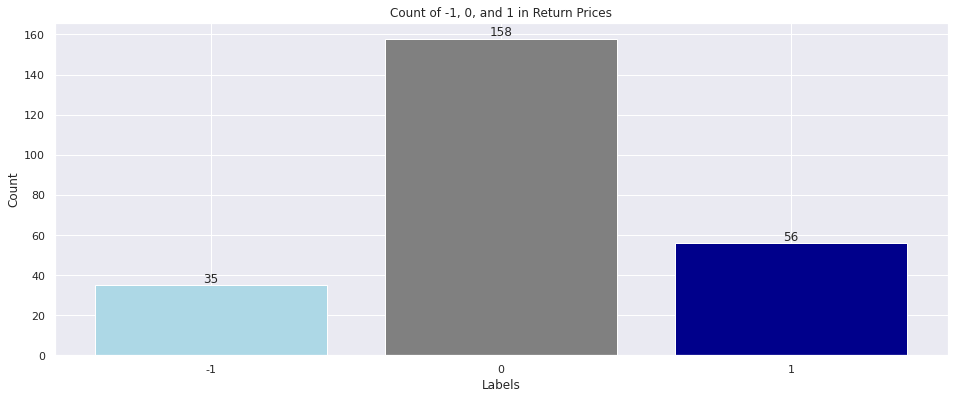

In [140]:
s = []

for i in return_price:
    if i >= 0.01:#since percent change so /100 resulting in 2 more zeroes after decimal point
        s.append(1)
    elif i > -0.01:
        s.append(0)
    else:
        s.append(-1)
# Count occurrences of -1, 0, and 1
counts = {label: s.count(label) for label in set(s)}

# Plot bar chart with light and dark blue for -1 and 1
colors = ['lightblue', 'gray', 'darkblue']
labels = ['-1', '0', '1']
values = [counts[-1], counts[0], counts[1]]

print(s)
# Plot bars
bars = plt.bar(labels, values, color=colors)
plt.title('Count of -1, 0, and 1 in Return Prices')
plt.xlabel('Labels')
plt.ylabel('Count')

# Display counts on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.show()


# Simplistic value function
if s(d+1) = 1 & s(d) = 0, then V(d+1) = V(d) + 1
else if s(d+1) = -1 & s(d) = 0, then V(d+1) = V(d) -1
and V(d+1) = V(d) in all other cases (including when we decide not to place a buy order trade for the day
d+1).

In [175]:
V=[0]*len(aapl_Prices)
for i in range(1,len(aapl_Prices)-1):
    if s[i]==1 and s[i-1]==0:
        V[i+1]=V[i]+1
    elif s[i]==-1 and s[i-1]==0:
        V[i+1]=V[i]-1
    else:
        V[i+1]=V[i]
print(V)
print("Portfolio value=",V[-1])

[0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17]
Portfolio value= 17


#### Max portfolio Values 

In [178]:
import pandas as pd

# max portfolio values
max_portfolio = max(V)
print("Maximum portfolio value:", max_portfolio)

indices = [i for i, v in enumerate(V) if v == max_portfolio]

print("Indices of maximum portfolio value:", indices)

for i in indices:
    print(reset['Date'][i].date())

Maximum portfolio value: 18
Indices of maximum portfolio value: [234, 235, 238, 239, 240, 241, 242]
2023-12-07
2023-12-08
2023-12-13
2023-12-14
2023-12-15
2023-12-18
2023-12-19


#### Calculate the probability distribution of going from the state s(d) to different possible states.

In [181]:
bull_to_flat = 0
bull_to_bear = 0
flat_to_bull = 0
flat_to_bear = 0
bear_to_flat = 0
bear_to_bull = 0
flat_to_flat = 0
bull_to_bull = 0
bear_to_bear = 0
# Initialize variables for portfolio value and optimal buy points
V = 0
optimal_buy_points = []

# Iterate over the 's' vector to count transitions and make decisions
for i in range(1, len(s)):
    current_state = s[i]
    previous_state = s[i - 1]

    # Count transitions based on the conditions you provided
    if current_state == 1 and previous_state == 0:
        flat_to_bull += 1
        # Assuming you place a buy order and update portfolio value
        V += 1
        optimal_buy_points.append(i)
    elif current_state == -1 and previous_state == 0:
        flat_to_bear += 1
        # Assuming you place a buy order and update portfolio value
        V -= 1
    elif current_state == 0 and previous_state == 1:
        bull_to_flat += 1
    elif current_state == 0 and previous_state == -1:
        bear_to_flat += 1
    elif current_state == -1 and previous_state == 1:
        bull_to_bear += 1
    elif current_state == 1 and previous_state == -1:
        bear_to_bull += 1
    elif current_state == 0 and previous_state == 0:
        flat_to_flat+=1
    elif current_state == 1 and previous_state == 1:
        bull_to_bull+=1
    elif current_state == -1 and previous_state == -1:
        bear_to_bear+=1
# Calculate transition probabilities
total_transitions = len(s) - 1
prob_bull_to_flat = round(bull_to_flat / total_transitions, 4)
prob_bull_to_bear = round(bull_to_bear / total_transitions, 4)
prob_flat_to_bull = round(flat_to_bull / total_transitions, 4)
prob_flat_to_bear = round(flat_to_bear / total_transitions, 4)
prob_bear_to_flat = round(bear_to_flat / total_transitions, 4)
prob_bear_to_bull = round(bear_to_bull / total_transitions, 4)
prob_flat_to_flat = round(flat_to_flat / total_transitions, 4)
prob_bull_to_bull = round(bull_to_bull / total_transitions, 4)
prob_bear_to_bear = round(bear_to_bear / total_transitions, 4)

# Print or use the transition probabilities as needed
print("Transition Probabilities:\n")
print(f"Probability of Bull to Flat: {prob_bull_to_flat}")
print(f"Probability of Bull to Bear: {prob_bull_to_bear}")
print(f"Probability of Flat to Bull: {prob_flat_to_bull}")
print(f"Probability of Flat to Bear: {prob_flat_to_bear}")
print(f"Probability of Bear to Flat: {prob_bear_to_flat}")
print(f"Probability of Bear to Bull: {prob_bear_to_bull}")

# Print optimal buy points and final portfolio value
print("\nOptimal Buy Points:", optimal_buy_points)
print("\nFinal Portfolio Value:", V)


Transition Probabilities:

Probability of Bull to Flat: 0.1532
Probability of Bull to Bear: 0.0282
Probability of Flat to Bull: 0.1613
Probability of Flat to Bear: 0.0927
Probability of Bear to Flat: 0.1048
Probability of Bear to Bull: 0.0161

Optimal Buy Points: [5, 7, 11, 15, 20, 27, 29, 40, 49, 51, 58, 60, 68, 78, 84, 87, 93, 99, 102, 107, 109, 112, 116, 119, 122, 132, 141, 159, 163, 176, 186, 190, 206, 208, 211, 215, 217, 231, 233, 237]

Final Portfolio Value: 17


#### Transition probability matrix


Transition Matrix:

[0.0202, 0.1048, 0.0161]
[0.0927, 0.379, 0.1613]
[0.0282, 0.1532, 0.0444]


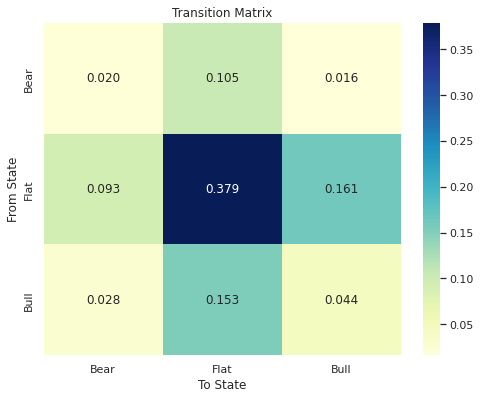

In [182]:
# Create a transition matrix
transition_matrix = [
    [prob_bear_to_bear, prob_bear_to_flat, prob_bear_to_bull],
    [prob_flat_to_bear, prob_flat_to_flat, prob_flat_to_bull],
    [prob_bull_to_bear, prob_bull_to_flat, prob_bull_to_bull]
]

# Display the transition matrix
print("\nTransition Matrix:\n")
for row in transition_matrix:
    print(row)
# Define state labels for better visualization
states = ['Bear', 'Flat', 'Bull']

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", xticklabels=states, yticklabels=states, fmt=".3f")
plt.title("Transition Matrix")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

#### Corresponding dates of optimal indices

In [184]:
# Convert the DataFrame index to datetime
aapl_optimal=aapl_processing
buy_dates = pd.to_datetime(aapl_optimal.index[optimal_buy_points])

# Print the corresponding dates for the buy indices
print("Corresponding dates for buy indices:")
for date in buy_dates:
    print(date.date())  # Print only the date part

Corresponding dates for buy indices:
2023-01-10
2023-01-12
2023-01-19
2023-01-25
2023-02-01
2023-02-10
2023-02-14
2023-03-02
2023-03-15
2023-03-17
2023-03-28
2023-03-30
2023-04-12
2023-04-26
2023-05-04
2023-05-09
2023-05-17
2023-05-25
2023-05-31
2023-06-07
2023-06-09
2023-06-14
2023-06-21
2023-06-26
2023-06-29
2023-07-14
2023-07-27
2023-08-22
2023-08-28
2023-09-15
2023-09-29
2023-10-05
2023-10-27
2023-10-31
2023-11-03
2023-11-09
2023-11-13
2023-12-04
2023-12-06
2023-12-12


#### To plot the optimal buy points dates

In [127]:
# To get return price
returns = reset['Return_Price']
weights=1

#covariance matrix annual 
cov_matrix_annual = returns.cov(returns) * 250#to annualize the 250 trading days
print('Covariance matrix=',cov_matrix_annual)

#variance
portfolio_var=np.dot(weights,np.dot(cov_matrix_annual,weights))
print('portfolio variance=',portfolio_var)

#std deviation
portfolio_std=np.sqrt(portfolio_var)
print('Standard Deviation=',portfolio_std)

port_annualReturn=np.sum(returns.mean()*weights)*250
print('Portfolio Annual return=',port_annualReturn)

percent_var=str(round(portfolio_var,2)*100)+'%'
percent_std=str(round(portfolio_std,2)*100)+'%'
percent_return=str(round(port_annualReturn,2)*100)+'%'

print('Annual variance=',percent_var)
print('Annual standard deviation=',percent_std)
print('Expected annual return=',percent_return)


Covariance matrix= 0.03934519194965675
portfolio variance= 0.0003934519194965676
Standard Deviation= 0.019835622488255003
Portfolio Annual return= 0.04568961813485078
Annual variance= 0.0%
Annual standard deviation= 2.0%
Expected annual return= 5.0%


#### Portfolio optimization

In [128]:
!pip install PyPortfolioOpt

In [129]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [152]:
expect = expected_returns.mean_historical_return(close_aapl)
S= risk_models.sample_cov(close_aapl)
#optimize for max sharpe ratio
efficient =  EfficientFrontier(expect, S)
weights =  efficient.max_sharpe()
cleaned_weights = efficient.clean_weights()
print(cleaned_weights)
efficient.portfolio_performance(verbose=True)

OrderedDict([('FIBBG000B9XRY4', 1.0)])
Expected annual return: 55.6%
Annual volatility: 20.0%
Sharpe Ratio: 2.69


(0.5561528433105996, 0.19954063517063567, 2.6869356352008826)

#### Forecasting price of next 20 days

In [165]:
# Assuming 'price' is the column you want to predict
print(close_aapl)
time_series = close_aapl['FIBBG000B9XRY4']

# Fit an ARIMA model with appropriate order
model = ARIMA(time_series, order=(1, 1, 1))
results = model.fit()

# Forecast the next 10 prices
forecast_steps = 20
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

print('Forecast values:')
print(forecast_values)

# Extend the date index for the forecasted values
last_date = time_series.index[-1]
freq = time_series.index.freq  # Get the frequency of the existing time series
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq=freq)

# Create a pandas Series with forecasted values and dates
forecast_series = pd.Series(forecast_values, index=forecast_dates[1:])


Sid         FIBBG000B9XRY4
Date                      
2023-01-03        124.2163
2023-01-04        125.4975
2023-01-05        124.1666
2023-01-06        128.7352
2023-01-09        129.2616
...                    ...
2023-12-22        193.3533
2023-12-26        192.8040
2023-12-27        192.9038
2023-12-28        193.3333
2023-12-29        192.2846

[250 rows x 1 columns]
Forecast values:
250    192.180646
251    192.231844
252    192.206628
253    192.219047
254    192.212931
255    192.215943
256    192.214460
257    192.215190
258    192.214831
259    192.215008
260    192.214921
261    192.214964
262    192.214942
263    192.214953
264    192.214948
265    192.214950
266    192.214949
267    192.214950
268    192.214949
269    192.214949
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/pytho

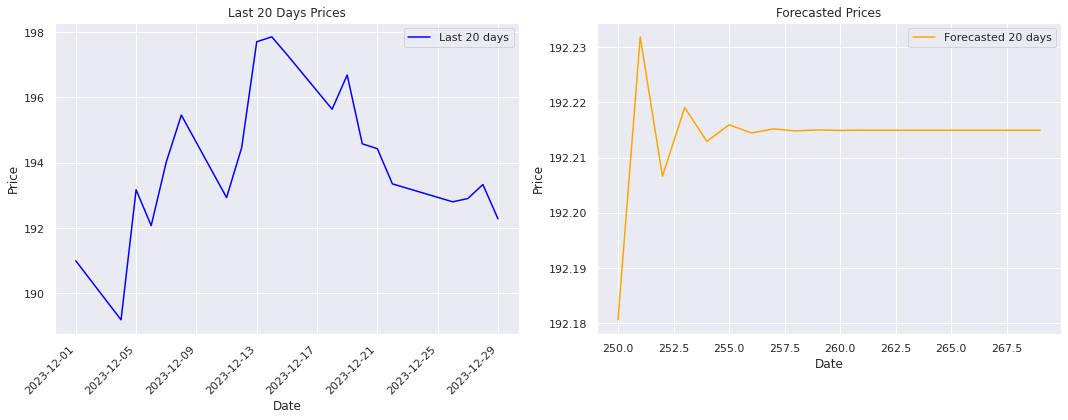

In [159]:
plt.figure(figsize=(15, 6))

# Subplot for last 20 days of given dates
plt.subplot(1, 2, 1)
plt.plot(time_series.index[-20:], time_series[-20:], label='Last 20 days', color='blue')
plt.title('Last 20 Days Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Set xticks and rotate x labels
plt.xticks(rotation=45, ha='right')

# Subplot for forecasted prices
plt.subplot(1, 2, 2)
plt.plot(forecast_values, label='Forecasted 20 days', color='orange')
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()